## Занятие 1: Проверка гипотез

#### Описание данных

* `ad_id` – идентификатор объявления (рекламы)
* `xyz_campaign_id` – идентификатор рекламной кампании в базе компании X
* `fb_campaign_id` – идентификатор кампании в Facebook
* `age` – возрастная группа, которой показывалась реклама
* `gender` – пол тех, кому показывалась реклама
* `interest` – код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
* `impressions` – число показов
* `clicks` – число кликов
* `spent` – сумма, которую компания потратила на показ объявления 
* `total_conversion` – количество людей, которые заинтересовались продуктом после просмотра рекламы
* `approved_conversion` – количество людей, которые купили продукт после просмотра рекламы

<div style="border: 2px solid #17a2b8; padding: 10px; border-radius: 10px; 
            box-shadow: 3px 3px 10px rgba(0,0,0,0.1);">
<b> Для начала подгрузим все необходимые библиотеки
</div>

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# и зададим параметры графиков 
sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

### 1 шаг. Подготовка данных

In [11]:
# Подгрузм наши данные 
conv = pd.read_csv('1_lesson_conversion.csv')

In [12]:
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [13]:
# проверим число наблюдений и столбцов
conv.shape

(1143, 11)

In [14]:
# типы данных
conv.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [15]:
# наличие пропущенных значений
conv.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

> **📌 Сколько уникальных рекламных кампаний было проведено?** 

In [17]:
conv.xyz_campaign_id.unique()

array([ 916,  936, 1178])

In [18]:
conv.xyz_campaign_id.nunique()

3

### 2 шаг. Построим график распределения числа показов


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


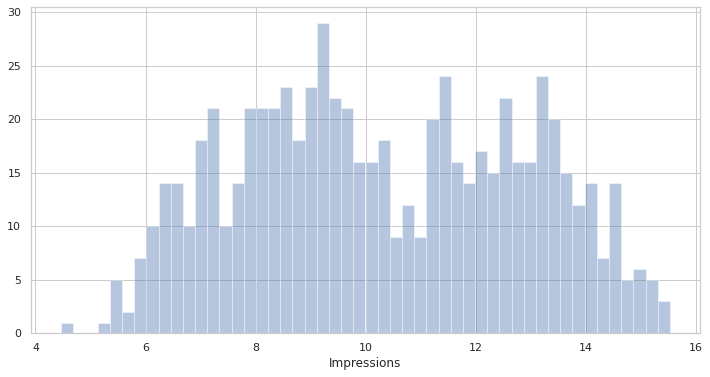

In [19]:
# общее распределение 
sns.distplot(np.log(conv.groupby('fb_campaign_id').Impressions.sum()), kde=False, bins=50)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

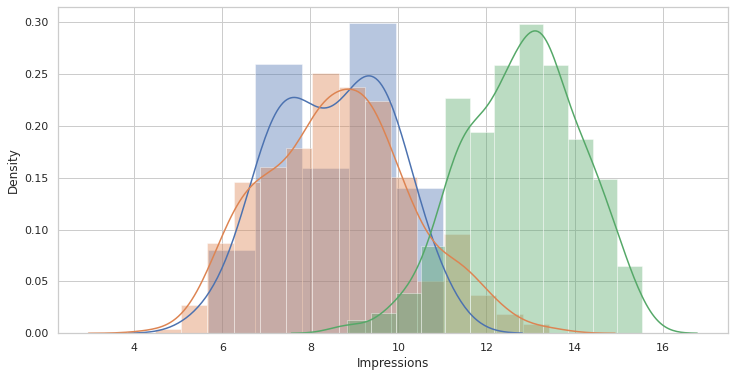

In [20]:
# распределение по выбранным компаниям 
sns.distplot(np.log(conv.query("xyz_campaign_id == 916").groupby('fb_campaign_id').Impressions.sum()))
sns.distplot(np.log(conv.query("xyz_campaign_id == 936").groupby('fb_campaign_id').Impressions.sum()))
sns.distplot(np.log(conv.query("xyz_campaign_id == 1178").groupby('fb_campaign_id').Impressions.sum()))

### 3 шаг. Посчитаем метрики

<div style="border: 2px solid #17a2b8; padding: 10px; border-radius: 10px; 
            box-shadow: 3px 3px 10px rgba(0,0,0,0.1);">
<b> CTR (click-through rate) - показывает кликабельность, т.е. сколько кликов получила реклама в сравнении с количеством показов. 
    
</div>

In [24]:
# создадим новую колонку
conv['ctr'] = conv.Clicks / conv.Impressions

In [25]:
conv.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

> **📌 Определите id с наибольшим CTR** 

In [26]:
conv.set_index("ad_id").ctr.idxmax()

738637

#### Визуализируем CTR с разбивкой по номеру рекламной кампании

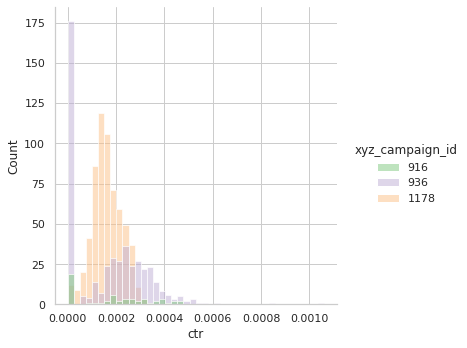

In [28]:
sns.displot(data = conv, x="ctr", hue = "xyz_campaign_id", palette = "Accent")

<div style="border: 2px solid #17a2b8; padding: 10px; border-radius: 10px; 
            box-shadow: 3px 3px 10px rgba(0,0,0,0.1);">
<b> CPC (cost-per-click) – стоимость за клик пользователя по объявлению. 
    
</div>

In [34]:
# создадим новую колонку
conv['cpc'] = (conv.Spent / conv.Clicks)

In [35]:
conv.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [36]:
# определим межквартильный размах
round(ss.iqr(conv.cpc, nan_policy='omit'), 2)

0.25

#### Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


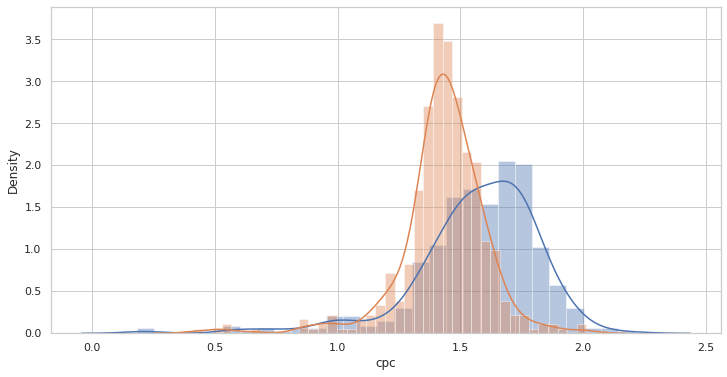

In [39]:
# чтобы избежать появление ошибки, укажем .dropna()
sns.distplot(conv.query("gender=='M'").cpc.dropna())
sns.distplot(conv.query("gender=='F'").cpc.dropna())

<div style="border: 2px solid #17a2b8; padding: 10px; border-radius: 10px; 
            box-shadow: 3px 3px 10px rgba(0,0,0,0.1);">
<b> Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа. 
    
</div>

In [41]:
# посчитаем конверсию из клика в покупку
conv['conv_rate'] =((conv.Approved_Conversion / conv.Clicks).mul(100))

In [58]:
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,conv_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,100.0
